# How long Does it Take to Sample Transitions in the Double Well

In this notebook we look at the results from our timing experiment to get a rough idea what are realistic noise strengths we can work with

In [1]:
from transition_time_test import alpha, load_results, save_directory
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Added /Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/Double-Well-SR to sys.path.


In [2]:
results = load_results(0)

## Looking how long it took

In [3]:
def mean_integration_time(r):
    "How long it takes to find a transition"
    return np.mean(r['cpu_times(s)'])

def time_in_minutes_per_transitions(r): # change to use cpu times when done properly
    return (mean_integration_time(r))/(60)

In [4]:
# Printing Results

for r in results:
    sigma = r['sigma']
    no_of_transitions = r['number_of_transitions']
    time_in_mins = time_in_minutes_per_transitions(r)
    transitions_per_day = (24 * 60)/time_in_mins
    print(f'For sigma = {sigma:.2f} we found {no_of_transitions} transitions.')
    print(f'It took roughly {time_in_mins:.2e} minutes to find a transition.')
    print(f'In a day we would find around {transitions_per_day:.2e} transitions')
    print()

For sigma = 0.30 we found 100 transitions.
It took roughly 7.98e-03 minutes to find a transition.
In a day we would find around 1.80e+05 transitions

For sigma = 0.25 we found 100 transitions.
It took roughly 4.52e-02 minutes to find a transition.
In a day we would find around 3.19e+04 transitions

For sigma = 0.20 we found 100 transitions.
It took roughly 6.49e+00 minutes to find a transition.
In a day we would find around 2.22e+02 transitions

For sigma = 0.19 we found 70 transitions.
It took roughly 2.01e+01 minutes to find a transition.
In a day we would find around 7.16e+01 transitions

For sigma = 0.18 we found 18 transitions.
It took roughly 7.40e+01 minutes to find a transition.
In a day we would find around 1.95e+01 transitions

For sigma = 0.17 we found 3 transitions.
It took roughly 3.12e+02 minutes to find a transition.
In a day we would find around 4.62e+00 transitions



In [5]:
import seaborn as sns

In [6]:
def result_to_df(results):
    dfs = []
    for r in results:
        sigma = r['sigma']
        sigmas = np.full_like(r['cpu_times(s)'], sigma)
        integration_time = r['integration_times']
        cpu_time_in_seconds = np.array(r['cpu_times(s)'])
        cpu_time_in_minutes = cpu_time_in_seconds/60
        cpu_time_in_hours = cpu_time_in_minutes/60
        cpu_time_in_days = cpu_time_in_hours/24
        transitions_per_day = 1/cpu_time_in_days
        dfs.append(pd.DataFrame(np.stack([sigmas, cpu_time_in_seconds, transitions_per_day, integration_time]).T, columns = ['sigma', 'cpu_time', 'Transitions per day', 'Integration Time']))      
    return pd.concat(dfs)


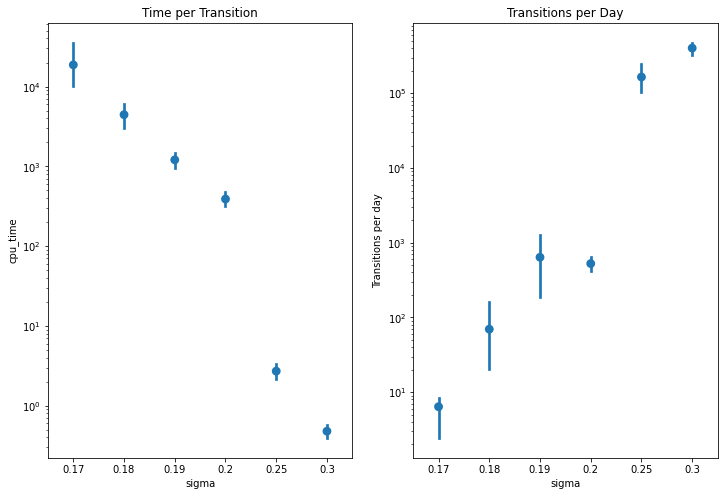

In [7]:
data = result_to_df(results)
fig, axes = plt.subplots( figsize=(12, 8), ncols=2)
sns.pointplot(x='sigma', y='cpu_time', data=data, ax=axes[0], join=False)
# sns.pointplot(x='sigma', y='Integration Time', data=data, ax=axes[0], join=False)
axes[0].set_title('Time per Transition')
sns.pointplot(x='sigma', y='Transitions per day', data=data, ax=axes[1], join=False)
axes[1].set_title('Transitions per Day')

for ax in axes:
    ax.set_yscale('log')

## Looking if times are exponentially distributed

Here we check if the exit times are exponentially distributed for different $\sigma$. Note this is rough as we saved the exit time coarsely.

In [8]:
import scipy.stats as st

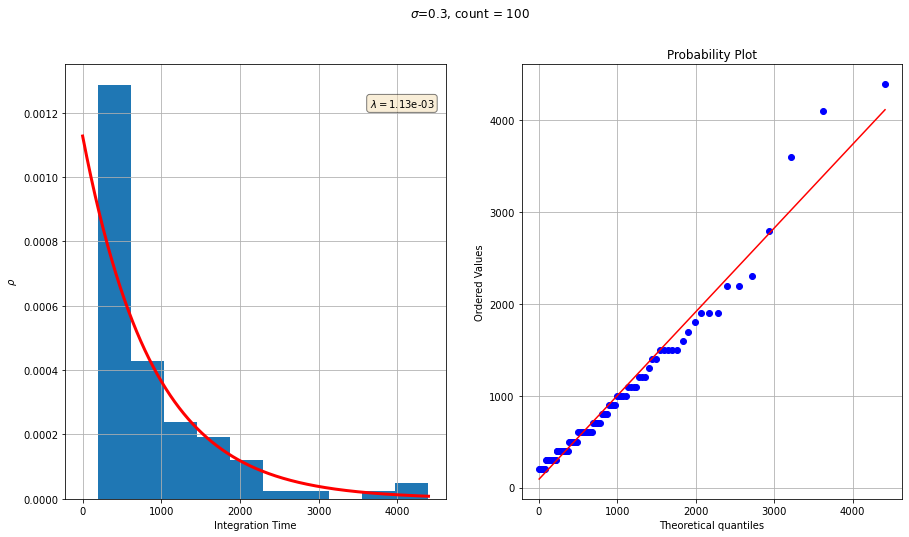

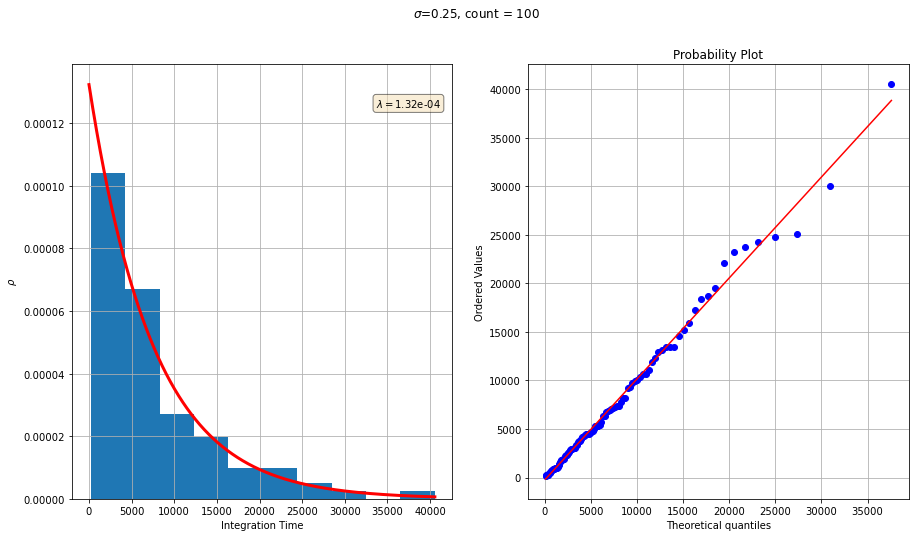

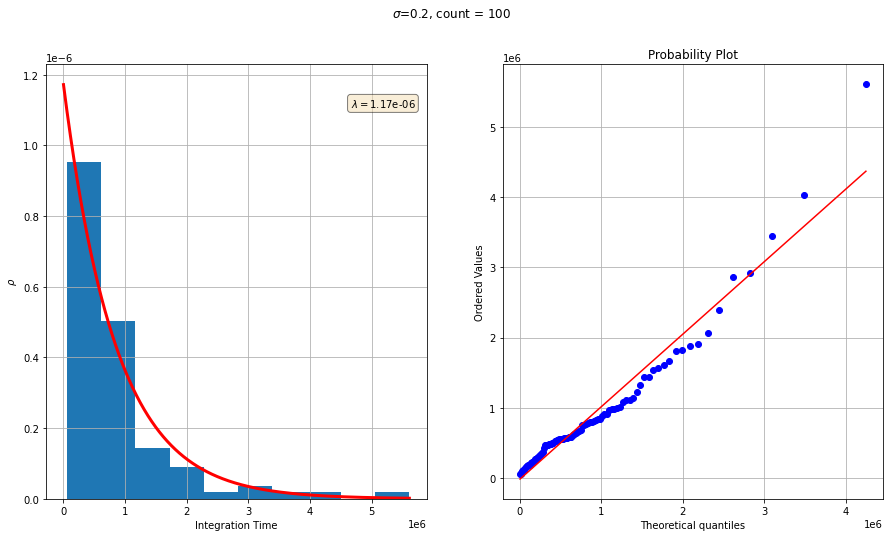

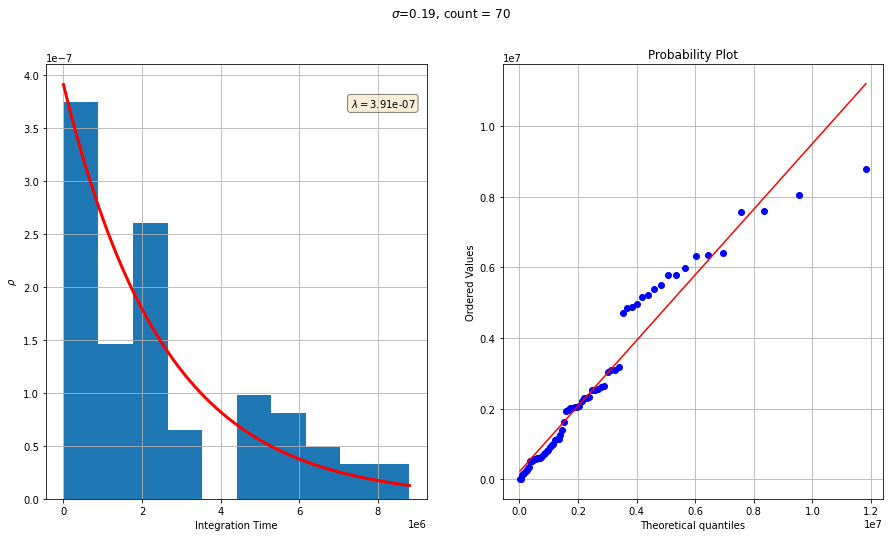

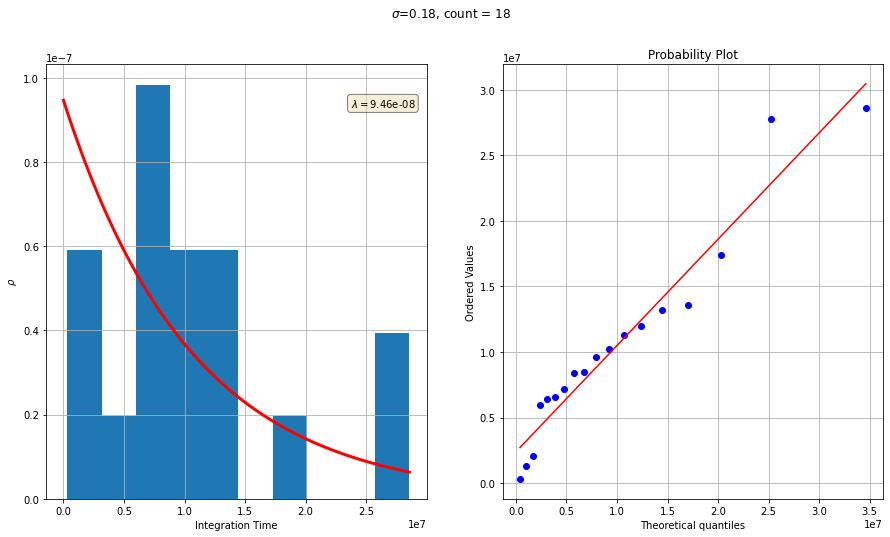

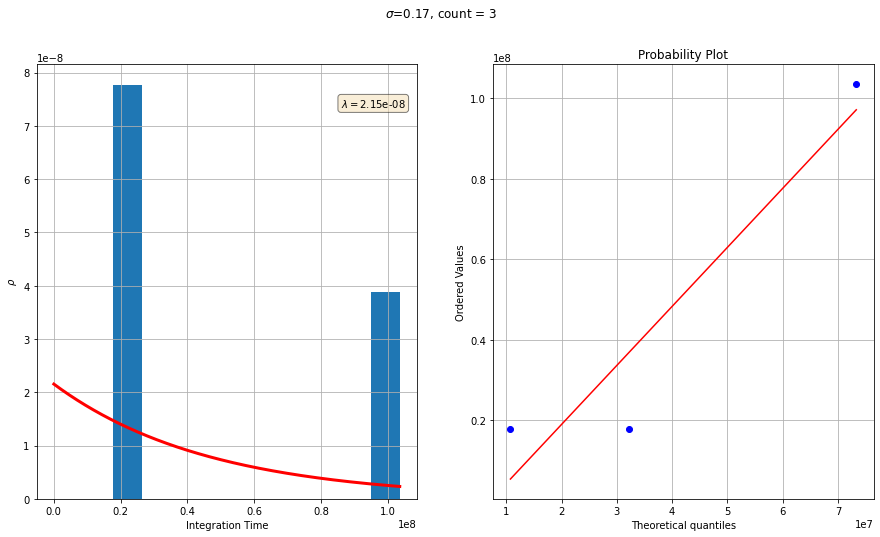

In [9]:
def exponential_check_plots(y, variable_name=''):
    "Returns standard plots to check if some data y is exponentially distributed"
    nbins = 10 #int(len(y)/10)
    
    # Plotting Histogram
    fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
    axes[0].hist(y, bins=nbins, density=True)
    axes[0].grid()
    
    # Fitting and plotting an exponential
    x = np.linspace(0, np.max(y), 1000)
    dist_exp = st.expon.pdf(x, scale=np.mean(y))
    axes[0].plot(x, dist_exp, '-r', lw=3)
    axes[0].set_ylabel('$\\rho$')
    axes[0].set_xlabel(variable_name)
    
    # Kolmogorov–Smirnov Goodness of fit test
#     ks_stat, p_value = st.kstest(y, st.expon.cdf, args=(0, np.mean(y)))
    
    # Adding Stats Text box
    stats_string = f'$\\lambda=${1/np.mean(y):.2e}'#'\nD={ks_stat:.2e}\np={p_value:.2e}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[0].text(0.8, 0.9, stats_string, transform=axes[0].transAxes, bbox=props)
    
    # Q-Q Plot
    axes[1].grid()
    res = st.probplot(integration_times, plot=axes[1], dist=st.expon, sparams=(0, np.mean(y)))

    return fig, axes

for r in results:
    integration_times = r['integration_times']
    fig, axes = exponential_check_plots(integration_times, variable_name='Integration Time')
    sigma = r['sigma']
    count = r['number_of_transitions']
    fig.suptitle(f'$\\sigma$={sigma}, count = {count}')